# Import and visualize dataset

In [59]:
import sklearn.utils
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.datasets import fetch_20newsgroups

In [2]:
twenty_train = fetch_20newsgroups(subset='train', shuffle=True, random_state=42)

In [3]:
twenty_test = fetch_20newsgroups(subset='test')

In [4]:
print(twenty_train.keys())

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])


### Visualize data

In [5]:
print(twenty_train.data[0])

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----







In [6]:
twenty_train.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

# Preprocessing

Before extract data into vector using `Bag of Words`, `TF`, ... We need to clean the text data and this process to prepare (or clean) text data before encoding is called **text preprocessing**.

***There are 3 main components:***
- Tokenization
- Normalization
- Noise removal

Paragraphs can be tokenized into sentences and sentences can be tokenized into words, it's **Tokenization**. **Normalization** aims to put all text on a level playing field, e.g., converting all characters to lowercase. **Noise removal** cleans up the text, e.g., remove extra whitespaces.


In [7]:
import re
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\manhd\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\manhd\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\manhd\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

Text preprocessing is necessary for later process. 
The main purpose off preprocessing is tranform text into a **predictable** and **analyzable** form.

*However*, in the data cleaning processing, ***there're change that we will lose possible features***. In practise, ***some feature only makes sense if they are extracted to each other after cleaning***.

***Text Preprocessing conclude:*** 
- HTML tags removal
- Extra whitespaces removal
- Punctuation removal
- Expand contractions
- Special characters removal
- Lowercase all texts
- Convert number words to numeric form
- Stopwords removal
- Lemmatization
- Stemming

## Preprocessing helper function

### Sentence tokenization and word tokenization

In [8]:
#sentence seqmentation
def sent_tokenization (text):
    return sent_tokenize(text)

#word tokenization
def word_tokenization (text):
    return word_tokenize(text)

### Removal function

In [9]:
#removing HTML tag
def removing_tag (text):
    return re.sub(r'<.*?>', '', text)

#removing URL
def removing_url (text):
    return re.sub(r'http\S+', '', text)

#removing special characters
def removing_special_character (text):
    return re.sub('[^a-zA-Z]', ' ', text)

#removing upper case characters
def removing_uppercase (text):
    return str(text).lower()

#removing stop words
def removing_stop_word (words):
    stop_words = set(stopwords.words('english'))
    return [word for word in words if word not in stop_words]

#remove the words having length <= 2
def removing_length (words):
    return [word for word in words if len(word) > 2]

### Word with different cases all map to the same lowercase form

In [10]:
#Stemming
def steamming (words):
    return [PorterStemmer().stem(word) for word in words]

#Lemmatization
def lenmatization (words):
    return [WordNetLemmatizer().lemmatize(word=word, pos='v') for word in words]

### Advanced normalization

### Apply all preprocessing

In [25]:
#apply all cleaner
def clean (text):
    res = removing_url(text)
    res = removing_special_character(res)
    res = removing_uppercase(res)
    res = word_tokenization(res)
    res = removing_stop_word(res)
    res = steamming(res)
    res = removing_length(res)
    return ' '.join(res)

# Analysist "preprocessing" process

In [11]:
import pandas as pd
from pprint import pprint 

Here, we are going to visualize some feature that will be removed after cleaning:

In [12]:
stop_words = set(stopwords.words('english'))
index = 0
dataset_info = []

for index in range(len(twenty_train.data)):
    temp_length = 0
    for sentence in sent_tokenize(twenty_train.data[index]):
        temp_length = len([word for word in word_tokenize(sentence) if word in stop_words])
    dataset_info.append([f"dataset #{index}", twenty_train.target[index], temp_length])

In [13]:
index = 0
stopwords_set = []

for index in range(len(twenty_train.data)):
    temp_length = 0
    for sentence in sent_tokenize(twenty_train.data[index]):
        [stopwords_set.append(word) for word in word_tokenize(sentence) if word in stop_words]

In [14]:
len(stopwords_set)
print(f"Number of stopword estimated in single data: {len(stopwords_set)/len(twenty_train.data)}")

Number of stopword estimated in single data: 98.79167403217252


In [15]:
df = pd.DataFrame(dataset_info)
df.columns = ["Text", "Target class", "Number of Stopwords"]
df.head()

,Text,Target class,Number of Stopwords
0,dataset #0,7,4
1,dataset #1,4,0
2,dataset #2,4,0
3,dataset #3,1,0
4,dataset #4,14,0


In [23]:
df.nlargest(30, "Number of Stopwords")

,Text,Target class,Number of Stopwords
8042,dataset #8042,17,199
692,dataset #692,19,176
960,dataset #960,7,60
1375,dataset #1375,7,50
1613,dataset #1613,10,42
3382,dataset #3382,11,41
1433,dataset #1433,5,40
11114,dataset #11114,5,40
2251,dataset #2251,1,39
10063,dataset #10063,5,39


In [26]:
#example
example = twenty_train.data[0]
after_clean = clean(example)
print(example, after_clean)

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----




 lerxst wam umd edu thing subject car nntp post host rac wam umd edu organ univers maryland colleg park line wonder anyon could enlighten car saw day door sport car look late earli call bricklin door realli small addit front bumper separ rest bodi know anyon tellm model name eng

## Feature Extraction

**Feature Extraction** is used to transform each text into a numerical representation in the form of a vector. (This process can contain *Tokenization, Vectorization, etc*)

Feature Extraction aims to reduce the number of features in a dataset by creating new features from the existing ones (and then discarding the original features)

***Feature Extraction advantages:***
- Accuracy improvements.
- Overfitting risk reduction.
- Speed up in training.
- Improved Data Visualization.
- Increase in explainability of our model.

# Train a classifier model without preprocessing

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB

### FE using BoW

In [28]:
from sklearn.feature_extraction.text import CountVectorizer

count_vector = CountVectorizer()
analyze = count_vector.build_analyzer()

### Using Naive Bayes to classify

In [31]:
clf = Pipeline([
    ('vect', CountVectorizer()),
    ('clf', MultinomialNB()),
])

In [33]:
#Training the model
clf.fit(twenty_train.data, twenty_train.target)

Pipeline(steps=[('vect', CountVectorizer()), ('clf', MultinomialNB())])

In [34]:
predicted = clf.predict(twenty_test.data)
np.mean(predicted == twenty_test.target)

0.7728359001593202

# Visualize the model

### Helper function

In [36]:
from sklearn import metrics

In [67]:
def draw_confusion_matrix(predicted, target=twenty_test.target, target_names = twenty_test.target_names, normalize = 'pred'):
    cm = metrics.confusion_matrix(target, predicted, normalize = normalize)
    df_cm = pd.DataFrame(cm, index = [i for i in target_names], columns = target_names)
    plt.figure(figsize = (20,10))
    sns.heatmap(df_cm, annot=True, fmt = ".2f")
    plt.title("Naive Bayes")
    plt.xlabel("Predicted Label")
    plt.ylabel("True label")
    plt.show()

In [71]:
def print_top_word(pipeline):
    clf = pipeline.named_steps.clf
    vectorizer = pipeline.named_steps.vect
    feature_names = vectorizer.get_feature_names()
    
    if hasattr(clf, 'coef_'):
        print("Top 20 keywords per class \n")
        for (i, label) in enumerate(twenty_train.target_names):
            top10 = np.argsort(clf.coef_[i])[-20:]
            print("%s: %s" % (label, ",".join([feature_names[idx] for idx in top10])))
        print('-' * 80)
    
    print('=' * 80)

In [69]:
def print_model(predicted, target=twenty_test.target, target_names=twenty_test.target_names):
    pprint(metrics.classification_report(target, predicted,
            target_names=target_names))

### Visualize

In [53]:
print_model(predicted)

                          precision    recall  f1-score   support

             alt.atheism       0.79      0.77      0.78       319
           comp.graphics       0.67      0.74      0.70       389
 comp.os.ms-windows.misc       0.20      0.00      0.01       394
comp.sys.ibm.pc.hardware       0.56      0.77      0.65       392
   comp.sys.mac.hardware       0.84      0.75      0.79       385
          comp.windows.x       0.65      0.84      0.73       395
            misc.forsale       0.93      0.65      0.77       390
               rec.autos       0.87      0.91      0.89       396
         rec.motorcycles       0.96      0.92      0.94       398
      rec.sport.baseball       0.96      0.87      0.91       397
        rec.sport.hockey       0.93      0.96      0.95       399
               sci.crypt       0.67      0.95      0.78       396
         sci.electronics       0.79      0.66      0.72       393
                 sci.med       0.87      0.82      0.85       396
         

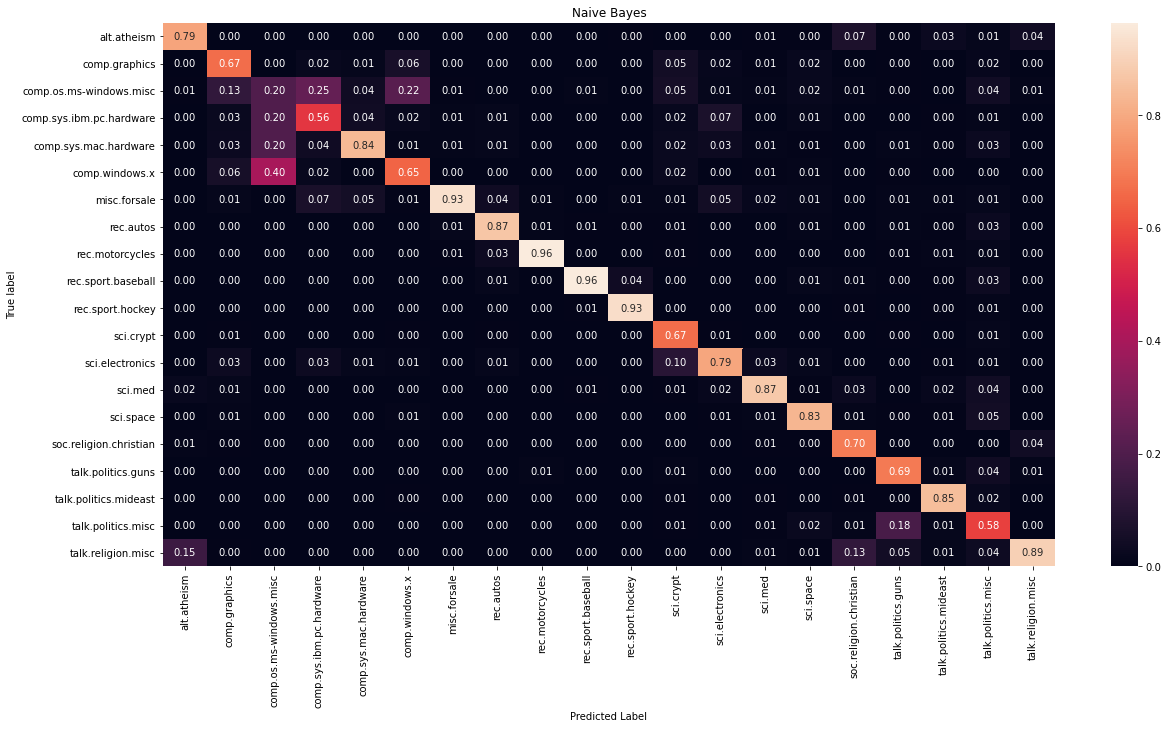

In [68]:
draw_confusion_matrix(predicted)

In [72]:
print_top_word(clf)

Top 20 keywords per class 

alt.atheism: or,but,as,from,have,for,edu,this,are,be,not,you,it,in,and,that,is,to,of,the
comp.graphics: can,lines,have,with,be,or,this,on,that,edu,you,from,it,for,in,is,and,of,to,the
comp.os.ms-windows.misc: pl,you,145,from,that,a86,edu,for,windows,b8f,g9v,in,it,is,and,of,to,the,max,ax
comp.sys.ibm.pc.hardware: com,or,drive,scsi,this,have,you,edu,on,from,with,that,for,in,it,is,of,and,to,the
comp.sys.mac.hardware: organization,be,subject,lines,this,have,you,on,with,from,that,edu,for,it,in,is,of,and,to,the
comp.windows.x: com,or,if,edu,are,with,be,you,this,from,that,on,it,for,in,is,and,of,to,the
misc.forsale: are,have,with,or,sale,organization,it,you,lines,subject,is,00,from,in,edu,of,to,and,for,the
rec.autos: my,with,this,are,car,com,have,from,edu,on,for,you,that,is,it,in,of,and,to,the
rec.motorcycles: subject,was,this,with,re,edu,my,from,com,on,for,that,you,is,it,in,of,and,to,the
rec.sport.baseball: they,was,but,be,on,this,you,have,from,it,for,he,that,is,edu

### Preprocessing before training model

In [75]:
preprocess_data = [clean(data) for data in twenty_train.data]

In [76]:
clf.fit(preprocess_data, twenty_train.target)

Pipeline(steps=[('vect', CountVectorizer()), ('clf', MultinomialNB())])

In [ ]:
predicted = clf.predict(twenty_test.data)
np.mean(predicted == twenty_test.target)

In [77]:
print_model(predicted)

('                          precision    recall  f1-score   support\n'
 '\n'
 '             alt.atheism       0.79      0.77      0.78       319\n'
 '           comp.graphics       0.67      0.74      0.70       389\n'
 ' comp.os.ms-windows.misc       0.20      0.00      0.01       394\n'
 'comp.sys.ibm.pc.hardware       0.56      0.77      0.65       392\n'
 '   comp.sys.mac.hardware       0.84      0.75      0.79       385\n'
 '          comp.windows.x       0.65      0.84      0.73       395\n'
 '            misc.forsale       0.93      0.65      0.77       390\n'
 '               rec.autos       0.87      0.91      0.89       396\n'
 '         rec.motorcycles       0.96      0.92      0.94       398\n'
 '      rec.sport.baseball       0.96      0.87      0.91       397\n'
 '        rec.sport.hockey       0.93      0.96      0.95       399\n'
 '               sci.crypt       0.67      0.95      0.78       396\n'
 '         sci.electronics       0.79      0.66      0.72       393\n'


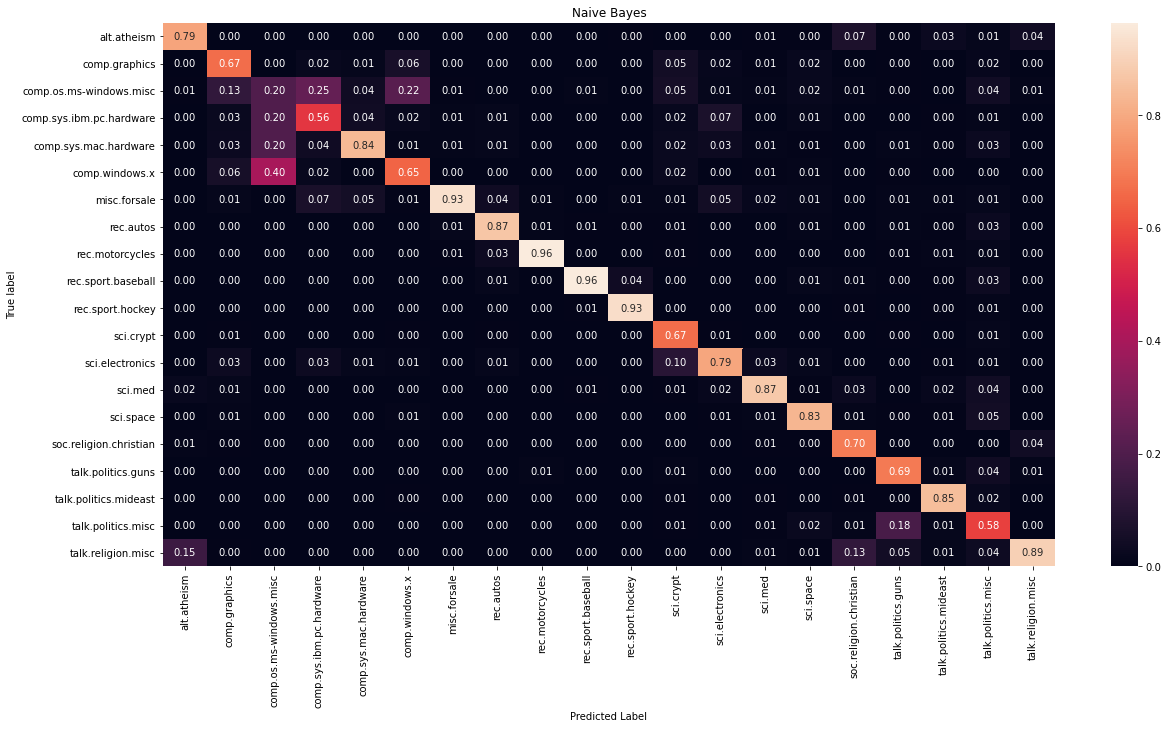

In [68]:
draw_confusion_matrix(predicted)

In [72]:
print_top_word(clf)

Top 20 keywords per class 

alt.atheism: or,but,as,from,have,for,edu,this,are,be,not,you,it,in,and,that,is,to,of,the
comp.graphics: can,lines,have,with,be,or,this,on,that,edu,you,from,it,for,in,is,and,of,to,the
comp.os.ms-windows.misc: pl,you,145,from,that,a86,edu,for,windows,b8f,g9v,in,it,is,and,of,to,the,max,ax
comp.sys.ibm.pc.hardware: com,or,drive,scsi,this,have,you,edu,on,from,with,that,for,in,it,is,of,and,to,the
comp.sys.mac.hardware: organization,be,subject,lines,this,have,you,on,with,from,that,edu,for,it,in,is,of,and,to,the
comp.windows.x: com,or,if,edu,are,with,be,you,this,from,that,on,it,for,in,is,and,of,to,the
misc.forsale: are,have,with,or,sale,organization,it,you,lines,subject,is,00,from,in,edu,of,to,and,for,the
rec.autos: my,with,this,are,car,com,have,from,edu,on,for,you,that,is,it,in,of,and,to,the
rec.motorcycles: subject,was,this,with,re,edu,my,from,com,on,for,that,you,is,it,in,of,and,to,the
rec.sport.baseball: they,was,but,be,on,this,you,have,from,it,for,he,that,is,edu